# Laboratorio 06: Álgebra Lineal.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Benjamin Escobar Jaramillo
*Métodos computacionales 2025-I*

---

In [ ]:
#@title $imports$
import numpy as np
from scipy.linalg import eigh #Para valores propios genralizados (punto final)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1.

<center>

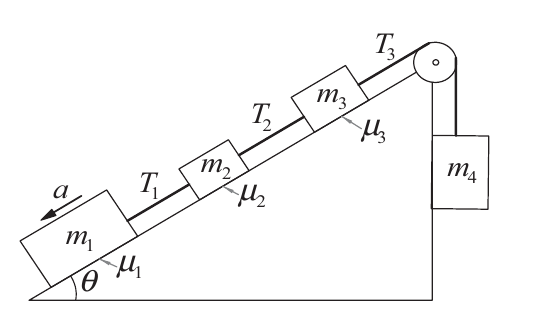

</center>

Cuatro bloques de masas diferentes $m_i$ están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo $\theta$, donde los coeficientes de fricción entre los bloques y el plano son $\mu_i$. Las ecuaciones de movimiento para el sistema son:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta)
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta)
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta)
$$
$$
-T_3 + m_4a = -m_4g
$$

donde:
- $T_i$ representan las tensiones en las cuerdas
- $a$ es la aceleración del sistema
- $\theta = 45^\circ$ es el ángulo de inclinación
- $g = 9.81 m/s^2$ es la aceleración gravitatoria


Determine $a$ y $T_i$

**Datos:**

Masas de los bloques:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coeficientes de fricción:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [ ]:
#Bien! Ya tenemos el sistema de ecuaciones listoo! solo queda resolver con nuestro arsenal!
#A) datos conocidos:
m=np.array([10,4,5,6])
mu=np.array([0.25,0.3,0.2])
#Luego, expresar el sistema de la forma Ax=b
theta=np.pi/4 #siempre conviene usar radssss
g=9.81

#A continuación se realiza la matriz! Note que tenemos 4 ecuaciones, 4 incongitas (T1,T2,T3,a).
#La forma de la matriz (estructura) fue calculado en papel, se presenta el resultado:
#queremos llegar a la forma Ax=b, donde x=[T1,T2,T3,a]
A=np.array([[1,0,0,m[0]],
            [-1,1,0,m[1]],                  #Voilà A
            [0,-1,1,m[2]],
            [0,0,-1,m[3]]],dtype=float)

b=np.array([ m[0]*g*(np.sin(theta)-mu[0]*np.cos(theta)),m[1]*g*(np.sin(theta)-mu[1]*np.cos(theta)),
            m[2]*g*(np.sin(theta)-mu[2]*np.cos(theta)), -m[3]*g]) #b (lado izquierdo de la ecuación)

x=np.linalg.solve(A,b)
T1,T2,T3,a=x
print(f'T1={T1},T2={T2},T3={T3},a={a}')

T1=35.89135719172326,T2=48.86055656372454,T3=68.54041454044618,a=1.6134024234076976


# 2.
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

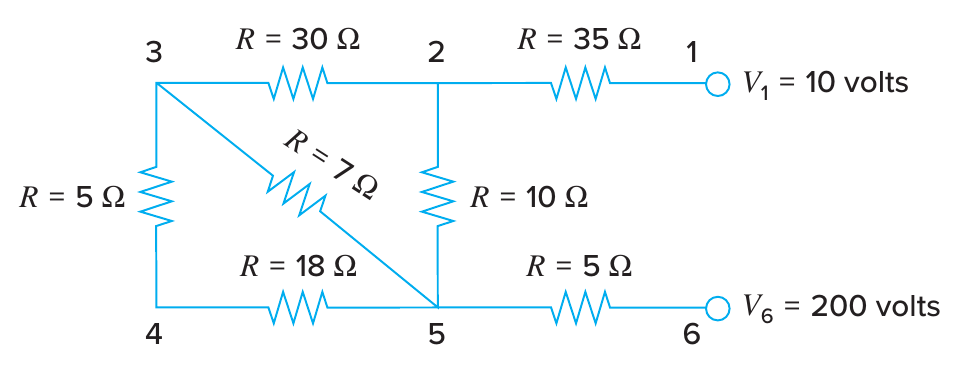


Construyamos entonces las ecuaciones.

In [ ]:
#Bien! Comencemos nuestro circuito! definamos las variables:
R1=35
R2=30
R3=7
R4=5
R5=18
R6=10
R7=5
#Y dada la configuración, podriamos ver una fuente asociada de 190v, por lo cual, construyamos nuestras ecuaciones:
#i=[i12,i23,i35,i34,i45,i25,i56]
A=np.array([[1,-1,0,0,0,-1,0], #nodo 2
            [0,1,-1,-1,0,0,0], #nodo 3
            [0,0,1,0,1,1,-1],#nodo 5
            [1,0,0,0,0,0,-1],#conservación de la carga
            [0,-R2,-R3,0,0,R6,0], #Espira en el tringulo superior
            [0,0,R3,-R4,-45,0,0], #inferior
            [R1,0,0,0,0,R6,R7]])  #el cuadrado derecho!

b=np.array([0,0,0,0,0,0,190])

I=np.linalg.solve(A,b)
print(f'i12={I[0]} A')
print(f'i23={I[1]} A')
print(f'i35={I[2]} A')
print(f'i34={I[3]} A')
print(f'i45={I[4]} A')
print(f'i25={I[5]} A')
print(f'i56={I[6]} A')

i12=3.9721780604133543 A
i23=0.860890302066773 A
i35=0.7551669316375194 A
i34=0.10572337042925341 A
i45=0.10572337042925264 A
i25=3.1112877583465823 A
i56=3.9721780604133543 A


# 3.
Se sabe que un sistema físico es gobernado por las ecuaciones,

$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

- Realice la diagonalización de $A$.

- Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

- Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

- Compare el resultado a la solución analítica,

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})),
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

In [ ]:
#Expresemos entonces a A como matriz;
A=np.array([[2,-1,1],
            [0,1,-1],
            [2,1,3]],dtype=float)
#Luego, la diagonalizamos!
val,vec=np.linalg.eig(A)
D=np.diag(val)
U=vec                   #Y voilá
Uinv=np.linalg.inv(U)

In [ ]:
#Confirmemos que todo halla salido bien:
np.isclose(A,U@D@Uinv).all() #Y efectivamente, todo va de maravilla

np.True_

In [ ]:
#Continuemos entonces:
#Empleemos r en su forma exponencial
r0 = np.array([1, 1, 2]) #Condicion inicial
def e_atr(t):
  return (U@np.exp(D*t)@Uinv)@r0 #Por proiedades!

#Dado que r esta asociado a (x,y,z), con la exponencial tenemos a x(t),y(t),z(t)!
t0=np.linspace(0,2,100)
xt=np.zeros_like(t0)
yt=np.zeros_like(t0)
zt=np.zeros_like(t0)
#Luego, iteramos para cada t
m=0
for i in t0:
  xt[m]=e_atr(i)[0]
  yt[m]=e_atr(i)[1]   #editamos cada entrada de x
  zt[m]=e_atr(i)[2]
  m+=1 #y actualizamos, pues i es un float, asi que con este hacemos la actualización!

/tmp/ipython-input-2593597313.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  xt[m]=e_atr(i)[0]
/tmp/ipython-input-2593597313.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  yt[m]=e_atr(i)[1]   #editamos cada entrada de x
/tmp/ipython-input-2593597313.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  zt[m]=e_atr(i)[2]


[Text(0.5, 0.92, '$r(t)$ numèrico'),
 Text(0.5, 0, 'x(t)'),
 Text(0.5, 0.5, 'y(t)'),
 Text(0.5, 0, 'z(t)')]

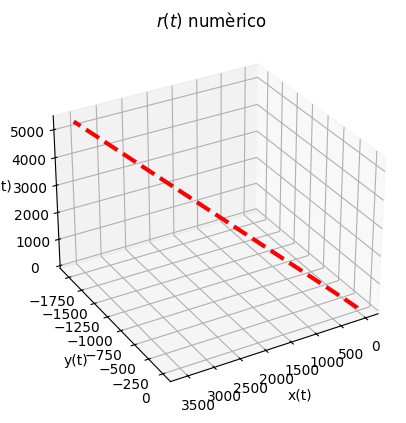

In [ ]:
#Finalmente, solo queda graficar! (que como no! en 3d!)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xt, yt, zt, label='$r(t)$',c='r', lw=3,ls='--')
ax.view_init(elev=30, azim=60) #Editamos la vista a gusto
ax.grid(True)
ax.set(title=('$r(t)$ numèrico'),
       xlabel=('x(t)'),
       ylabel=('y(t)'),
       zlabel=('z(t)'))

/tmp/ipython-input-3657862111.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  xrealt[m]=e_atr(i)[0]
/tmp/ipython-input-3657862111.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  yrealt[m]=e_atr(i)[1]   #mismo proceso
/tmp/ipython-input-3657862111.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  zrealt[m]=e_atr(i)[2]


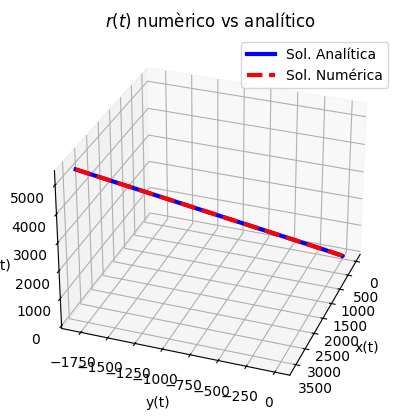

In [ ]:
#Hagamos ahora, la comparación analítica

def xreal(t):
 return (1)*((np.exp(2*t)*(1+np.exp(2*t)-2*t)) + (1)*(-2*t*np.exp(2*t)) + (2)*(np.exp(2*t)*(-1+np.exp(2*t))))*(1/2)

def yreal(t):
  return (1/2)*((1)*(-np.exp(2*t)*(1-np.exp(2*t)-2*t)) + ((1)*(2*(t+1)*np.exp(2*t))) + ((2)*(-np.exp(2*t)*(-1+np.exp(2*t))))  )

def zreal(t):
  return (1/2)*(((1)*(np.exp(2*t)*(-1+np.exp(2*t)+2*t)))  + ((1)*(2*t*np.exp(2*t))) + ((2)*(np.exp(2*t)*(1+np.exp(2*t)))) )

#Vaya Odisea! Huh? bien, ahora hagamos un procedimiento análogo y comparemos!!
t0=np.linspace(0,2,100)
xrealt=np.zeros_like(t0)
yrealt=np.zeros_like(t0)
zrealt=np.zeros_like(t0)
m=0
for i in t0:
  xrealt[m]=e_atr(i)[0]
  yrealt[m]=e_atr(i)[1]   #mismo proceso
  zrealt[m]=e_atr(i)[2]
  m+=1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xrealt, yrealt, zrealt, label='Sol. Analítica',c='b', lw=3)
ax.plot(xt, yt, zt, label='Sol. Numérica',c='r', lw=3,ls='--')
ax.view_init(elev=30, azim=20) #Editamos la vista a gusto
ax.grid(True)
ax.set(title=('$r(t)$ numèrico vs analítico'),
       xlabel=('x(t)'),
       ylabel=('y(t)'),
       zlabel=('z(t)'))
ax.legend() #Y voilà! podemos ver que los resultados coinciden de maravilla! :)))

# 4.
Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

$$
\hat{H}|\Psi\rangle = E|\Psi\rangle
$$

donde el Hamiltoniano está dado por $H = -{\mu} \cdot {B} = -\gamma {B} \cdot {S}$, siendo $\gamma$ la razón giromagnética, ${B}$ el campo magnético y ${S}$ el espín. Puede demostrarse que el Hamiltoniano se expresa como:

$$
\hat{H} = -\frac{\gamma\hbar}{2}\begin{pmatrix}
B_z & B_x - iB_y \\
B_x + iB_y & -B_z
\end{pmatrix}
$$

El valor experimental de $\gamma$ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

- Verifique que $H$ es hermítica.
- Encuentre los niveles de energía permitidos.
- Determine los autovectores y verifique su normalización.



In [ ]:
#Perfecto! Organicemos entonces nuestra matrices!
#Primero, nuestras constantes en el SI! (MKS)
gamma=2
B=1e-4
hbarra=1.054571817*1e-34 #(en J*s)
#Luego, nuestra matriz
H=np.array([[B,0], #NOte que B solo tiene componentes en Z, asi que Bx y By son =0
             [0,-B]],dtype=complex) #Y para manejar conjugadas y eso, que sea compleja
Hgorrito=((-gamma*hbarra)/2)*H #Aca tenemos la matriz, verifiquemos entonces si es hermítica

In [ ]:
np.isclose(Hgorrito,np.conjugate(np.transpose(Hgorrito))).all() #Eureka! Es hermítica!

np.True_

In [ ]:
#Bien, los niveles de energía estan asociados a los valores propios! como es hermítica, usemos .eigh
val,vec=np.linalg.eigh(Hgorrito) #Obtenemos los valores y los vectores propios

In [ ]:
print(f'Los niveles de energía son: {val[0]} y {val[1]}')

Los niveles de energía son: -1.054571817e-38 y 1.054571817e-38


In [ ]:
print(f'Los valores propios son: {vec[0]} y {vec[1]}, cuyas normas son {np.linalg.norm(vec[0])} y {np.linalg.norm(vec[1])} respectivamente ')

Los valores propios son: [1.+0.j 0.+0.j] y [0.+0.j 1.+0.j], cuyas normas son 1.0 y 1.0 respectivamente 


# 5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura.

<center>

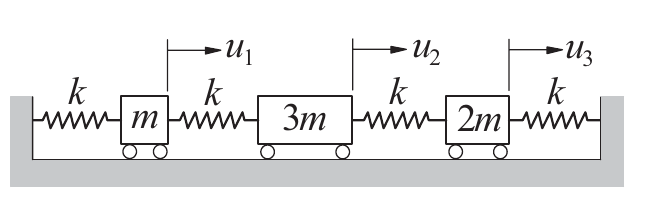
</center>

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

$$
k \left( -2u_1 + u_2 \right) = m\ddot{u}_1
$$

$$
k(u_1 - 2u_2 + u_3) = 3m\ddot{u}_2
$$

$$
k(u_2 - 2u_3) = 2m\ddot{u}_3
$$

donde:
- $u_i(t)$ representa el desplazamiento de la masa $i$ desde su posición de equilibrio.
- $k$ es la constante de los resortes.
- $m$ es la masa.

Determinar las frecuencias de vibración ($\omega$) en términos de $\sqrt{k/m}$ y las formas modales correspondientes.

In [ ]:
#Perfecto! a trabajar entonces.
#Demos valores arbitrarios:
k=1  #Por simplicidad
m=1
#Luego, entiendiendo el problema per se; empleamos la expresión Ku=Mu'', por lo cual
K=np.array([[-2*k,k,0],
            [k,-2*k,k],
            [0,k,-2*k]],dtype=float)

M=np.array([[m,0,0],
            [0,3*m,0],          #Voilà m y k
            [0,0,2*m]],dtype=float)

#Posteriormente; Resolvemos el problema generalizado de valores propios: K v = w² M v, es decir

val, modos =eigh(K, M) #Recordemos que los valores propios es omega^2, por lo cual...
frec=np.sqrt(abs(val)) #los metemos como valor absoluto, pues estan al cuadrado! (evitar nans)

#Finalmente, queremos la frecuencia "real", es decir, multiplicada por el factor sqrt(k/m), asi que solo basta...
frecuenciasfinales=(np.sqrt(k/m)*frec)
print(f'Las frecuencias ω en terminos de sqrt(k/m) son {frecuenciasfinales}')
print(f'y los modos son {modos}')

Las frecuencias ω en terminos de sqrt(k/m) son [1.49429737 1.08670167 0.50281358]
y los modos son [[-0.92033789 -0.27460877 -0.27851068]
 [ 0.21436937 -0.2249264  -0.48660787]
 [-0.08693531  0.62161659 -0.32563027]]
